In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

samples=[]
num_samples=15
for n in range(num_samples):
    sample_filename=os.path.join(os.getcwd(),'_data/sample_{}.pkl'.format(n+1))
    df=pd.read_pickle(sample_filename)
    df['sample']=n+1
    if df.loc[0,'retention time [min]']<2.2:
        df.loc[0,'name']='Acetaldehyde'
    samples.append(df)

full_run=pd.concat(samples)
full_run.head()

# import abv information
abv_file=os.path.join(os.getcwd(),'_data/measured_abvs.pkl')
run_abvs=pd.read_pickle(abv_file)
print(run_abvs)

    sample   abv
0        1  79.6
1        2  82.9
2        3  82.9
3        4  82.7
4        5  82.5
5        6  82.1
6        7  81.6
7        8  80.9
8        9  79.3
9       10  77.9
10      11  74.6
11      12  67.1
12      13  60.1
13      14  53.1
14      15  43.7


In [2]:
acetate_runs=full_run[full_run['retention time [min]']<2.2]
print(acetate_runs.head())

   retention time [min] peak type  peak width [min]  peak area  peak height  \
0                 2.143        BV            0.1302    43.1899       3.9605   
0                 2.141        BV            0.1213     9.8412       0.9876   
0                 2.151        BV            0.1295     7.1141       0.6614   

    area%          name  sample  
0  0.1404  Acetaldehyde       1  
0  0.0354  Acetaldehyde       2  
0  0.0225  Acetaldehyde       3  


## sample times and references

In [3]:
from datetime import date,datetime,timedelta
# sample times
sample_times=[datetime(year=2019,month=1,day=24,hour=9,minute=44,second=34),
             datetime(year=2019,month=1,day=24,hour=10,minute=14,second=21),
             datetime(year=2019,month=1,day=24,hour=10,minute=44,second=14),
             datetime(year=2019,month=1,day=24,hour=11,minute=14,second=7),
             datetime(year=2019,month=1,day=24,hour=11,minute=44,second=1),
             datetime(year=2019,month=1,day=24,hour=12,minute=13,second=59),
             datetime(year=2019,month=1,day=24,hour=12,minute=44,second=0),
             datetime(year=2019,month=1,day=24,hour=13,minute=14,second=0),
             datetime(year=2019,month=1,day=24,hour=13,minute=43,second=57),
             datetime(year=2019,month=1,day=24,hour=14,minute=13,second=57),
             datetime(year=2019,month=1,day=24,hour=14,minute=43,second=55),
             datetime(year=2019,month=1,day=24,hour=15,minute=13,second=45),
             datetime(year=2019,month=1,day=24,hour=15,minute=43,second=29),
             datetime(year=2019,month=1,day=24,hour=16,minute=13,second=10),
             datetime(year=2019,month=1,day=24,hour=16,minute=42,second=56)]
istds={'1':8.1022,
      '2':9.1549,
      '3':13.9048,
      '4':13.3818,
      '5':13.6567,
      '6':14.9222,
      '7':16.3177,
      '8':12.6474,
      '9':14.8749,
      '10':14.6242,
      '11':13.8667,
      '12':14.5082,
      '13':14.8999,
      '14':14.9449,
      '15':17.9518}

known_compounds=list(full_run.name.unique())
known_compounds.remove('')
print(known_compounds)

['Acetaldehyde', 'Ethyl acetate', 'n-Propanol', 'iso-Butanol', 'iso-Amylalcohol', 'Pentanol', ' iso-Amylalcohol', ' Pentanol', ' n-Propanol', 'Furfural']


In [4]:
trace=full_run[full_run['name']=='Ethyl acetate']
trace.head(10)

,retention time [min],peak type,peak width [min],peak area,peak height,area%,name,sample
3,3.349,BB,0.1222,1150.2800,133.9150,3.7397,Ethyl acetate,1
2,3.321,BB,0.1099,241.4463,29.9867,0.8694,Ethyl acetate,2
2,3.323,BB,0.1126,138.7885,16.5903,0.4398,Ethyl acetate,3
0,3.318,BB,0.1045,94.5185,12.1857,0.3266,Ethyl acetate,4
0,3.323,BB,0.1066,54.9431,7.4048,0.2025,Ethyl acetate,5
0,3.325,BB,0.1003,27.5230,3.7223,0.1030,Ethyl acetate,6
0,3.319,BB,0.1050,31.0393,4.1137,0.1056,Ethyl acetate,7
0,3.296,BB,0.0671,2.2905,0.4232,0.0113,Ethyl acetate,8
0,3.333,BB,0.0537,1.0437,0.2605,0.0040,Ethyl acetate,11


In [5]:
peaks=np.array(trace['peak area'])
sample_nums=np.array(trace['sample'])
trace_rfs=[]
for peak,s in zip(peaks,sample_nums):
    trace_rfs.append(peak/istds[str(s)])
rfs=np.array(trace_rfs)
trace_concs=1.1104e-02*rfs+0.0525
print(trace_concs)

[1.6289495  0.34535079 0.16333277 0.13092991 0.09717318 0.07298059
 0.07362187 0.05451098 0.05333576]


In [6]:
# import calibration data
calib_file=os.path.join(os.getcwd(),'_data/calibration_fit_mass_vol.pkl')
calibration=pd.read_pickle(calib_file)
calibration.head()

,a,b
Acetaldehyde,0.001016,-0.030708
Ethyl acetate,0.000978,0.052489
Acetal,0.001157,0.320902
Methanol,0.002442,2.001791
n-Propanol,0.001283,0.013997


In [7]:
delta_t=sample_times[1]-sample_times[0]
print(delta_t)
print(calibration.index.unique())

0:29:47
Index(['Acetaldehyde', 'Ethyl acetate', 'Acetal', 'Methanol', 'n-Propanol',
       'i-Butanol', 'i-Pentylacetate', 'n-Butanol', 'i-Amylalcohol',
       'Furfural'],
      dtype='object')


In [8]:
find_list=['iso-Butanol', 'iso-Amylalcohol',' iso-Amylalcohol',' Pentanol',' n-Propanol']
replace_list=['i-Butanol','i-Amylalcohol','i-Amylalcohol','Pentanol','n-Propanol']

full_run['name'].replace(to_replace=find_list,value=replace_list,inplace=True)
identified=list(full_run['name'].unique())
identified.remove('')
experiment_filename=os.path.join(os.getcwd(),'_data/full_run.pkl')
full_run.to_pickle(experiment_filename)
print(identified)

['Acetaldehyde', 'Ethyl acetate', 'n-Propanol', 'i-Butanol', 'i-Amylalcohol', 'Pentanol', 'Furfural']


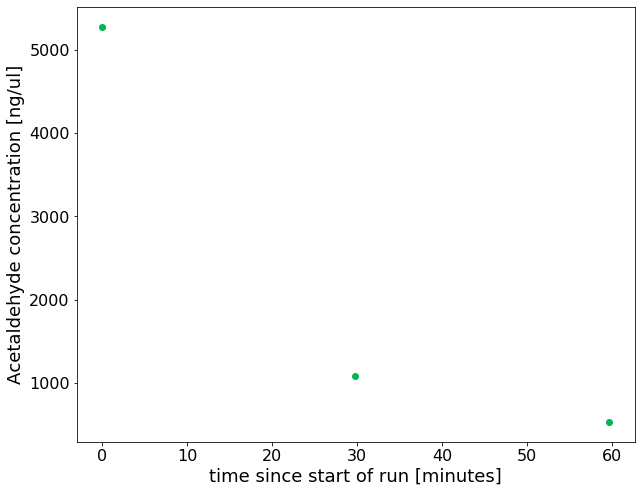

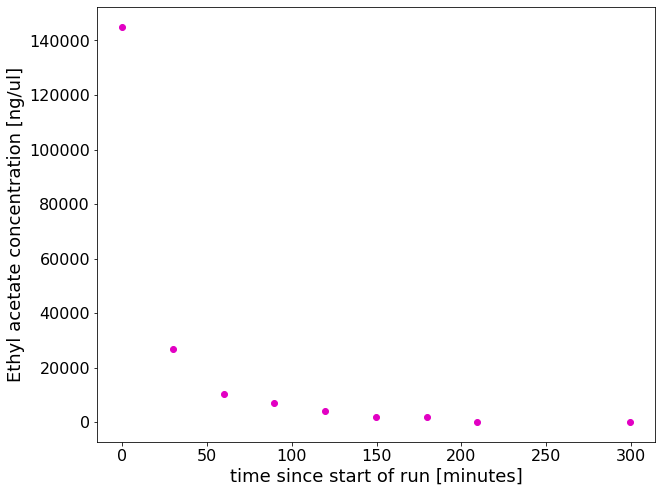

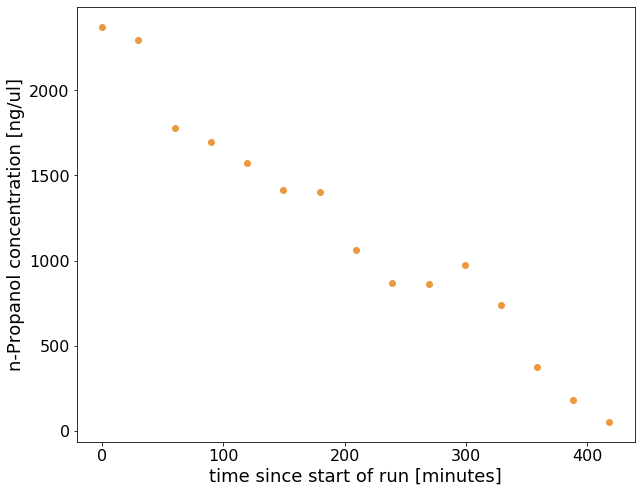

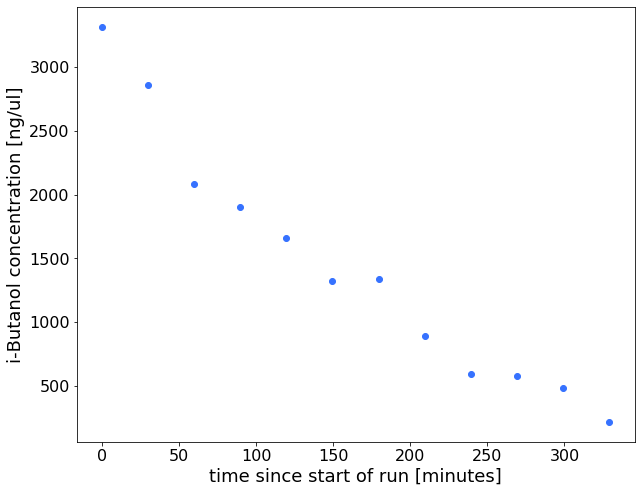

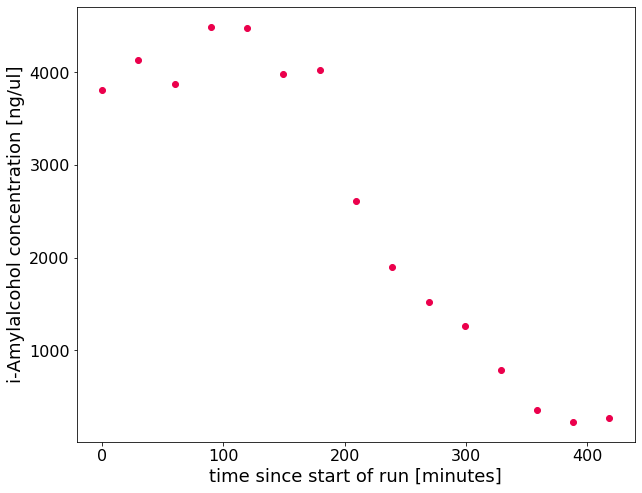

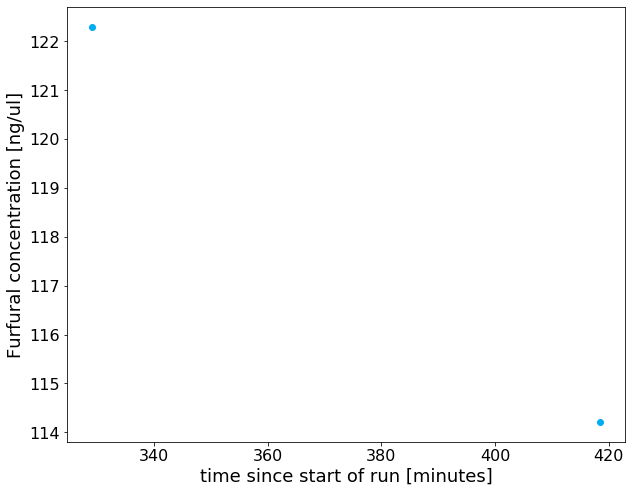

In [9]:
font={'family':'sans-serif',
      'size':18,
      'color':'black'
      }

chem_cols=["#00b84f",
"#e200c3",
"#ec983f",
"#3672ff",
"#eb004c",
"#00adf3"]

sps=identified
internal_std='Pentanol'
sps.remove(internal_std)
for chem,col in zip(sps,chem_cols):
    if not chem == internal_std:
        trace=full_run[full_run['name']==chem]
        peaks=np.array(trace['peak area'])
        sample_nums=np.array(trace['sample'])
        trace_rfs=[]
        trace_times=[]
        for peak,s in zip(peaks,sample_nums):
            trace_rfs.append(peak/istds[str(s)])
            trace_times.append(sample_times[s-1])
        xs=[t-sample_times[0] for t in trace_times]
        x=[x.total_seconds()/60 for x in xs]
        rfs=np.array(trace_rfs)
        trace_concs=(rfs-calibration.loc[chem,'b'])/calibration.loc[chem,'a']
        fig,ax=plt.subplots(1,figsize=(10,8))
        ax.scatter(x,trace_concs,label=chem,c=col)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        ax.set_ylabel('{} concentration [ng/ul]'.format(chem),fontdict=font)
        ax.set_xlabel('time since start of run [minutes]'.format(chem),fontdict=font)
        pic_file=os.path.join(os.getcwd(),'_output/concentrations_{}.png'.format(chem))
        plt.savefig(pic_file,bbox_inches='tight')
    

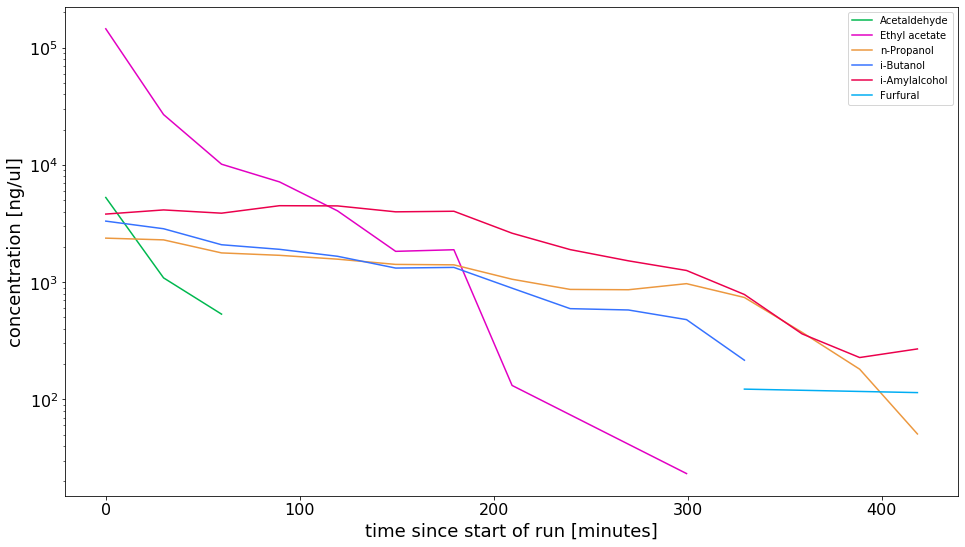

In [10]:


fig,ax=plt.subplots(1,figsize=(16,9))
for chem,col in zip(sps,chem_cols):
    if not chem == internal_std:
        trace=full_run[full_run['name']==chem]
        peaks=np.array(trace['peak area'])
        sample_nums=np.array(trace['sample'])
        trace_rfs=[]
        trace_times=[]
        for peak,s in zip(peaks,sample_nums):
            trace_rfs.append(peak/istds[str(s)])
            trace_times.append(sample_times[s-1])
        xs=[t-sample_times[0] for t in trace_times]
        x=[x.total_seconds()/60 for x in xs]
        rfs=np.array(trace_rfs)
        trace_concs=(rfs-calibration.loc[chem,'b'])/calibration.loc[chem,'a']
        ax.plot(x,trace_concs,label=chem,c=col)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('concentration [ng/ul]',fontdict=font)
ax.set_xlabel('time since start of run [minutes]',fontdict=font)
plt.legend()
pic_file=os.path.join(os.getcwd(),'_output/experiment_conc.png')
plt.yscale("log")
plt.savefig(pic_file,bbox_inches='tight')   

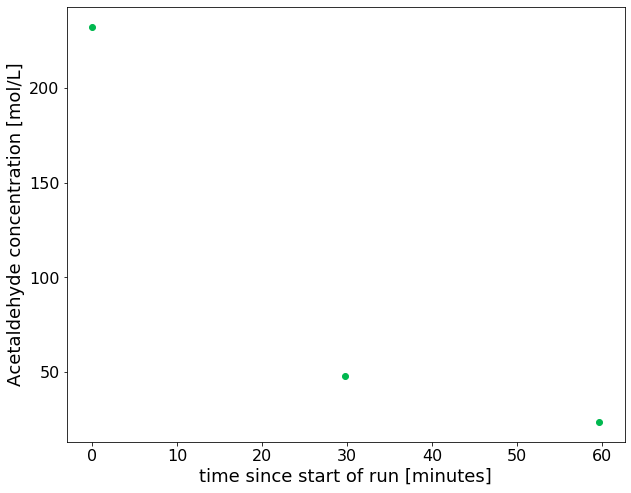

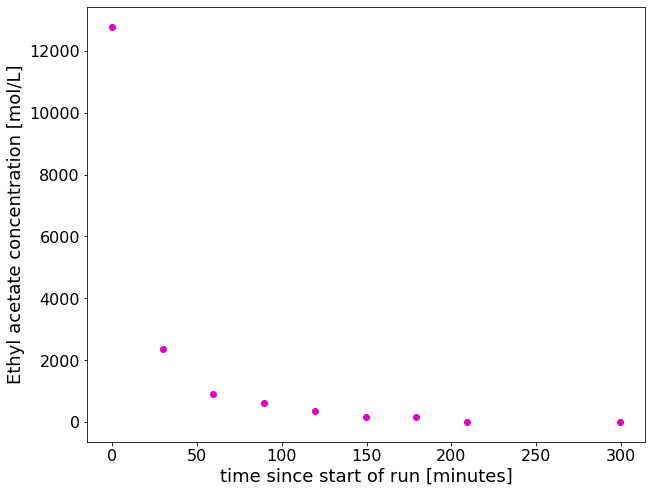

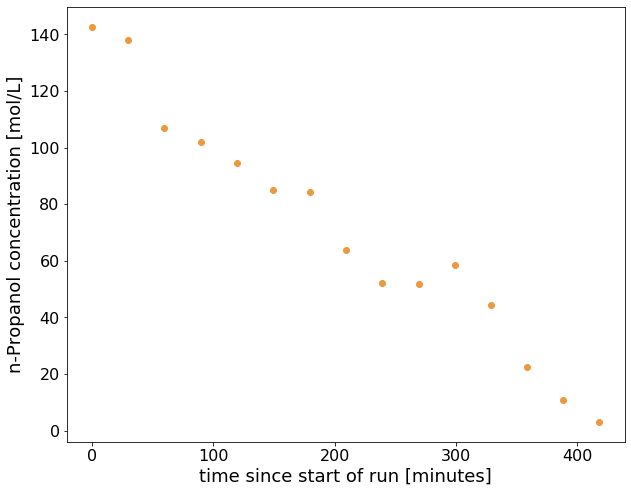

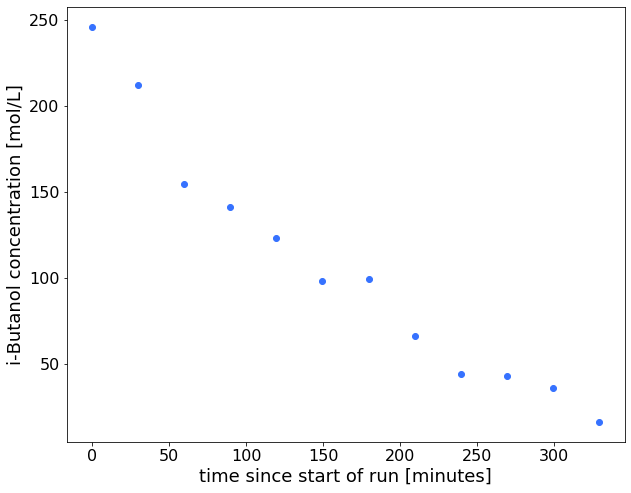

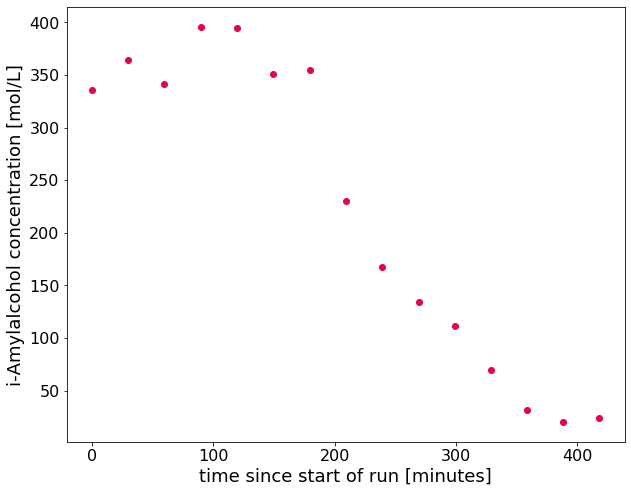

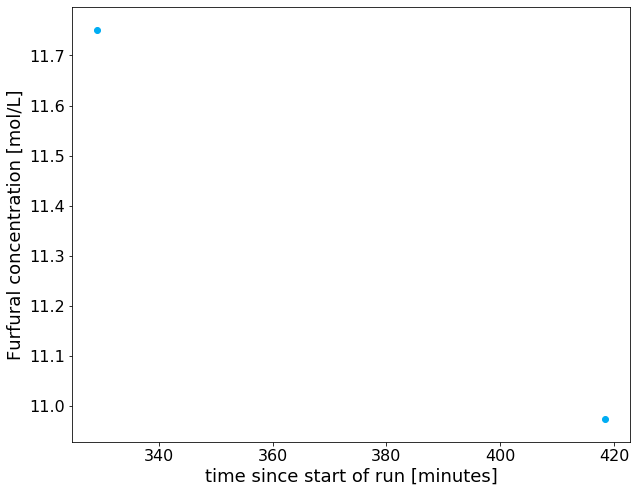

In [11]:
calib_file=os.path.join(os.getcwd(),'_data/calibration_fit_molar.pkl')
calibration_mol=pd.read_pickle(calib_file)

for chem,col in zip(sps,chem_cols):
    if not chem == internal_std:
        trace=full_run[full_run['name']==chem]
        peaks=np.array(trace['peak area'])
        sample_nums=np.array(trace['sample'])
        trace_rfs=[]
        trace_times=[]
        for peak,s in zip(peaks,sample_nums):
            trace_rfs.append(peak/istds[str(s)])
            trace_times.append(sample_times[s-1])
        xs=[t-sample_times[0] for t in trace_times]
        x=[x.total_seconds()/60 for x in xs]
        rfs=np.array(trace_rfs)
        trace_concs=(rfs-calibration_mol.loc[chem,'b'])/calibration_mol.loc[chem,'a']
        fig,ax=plt.subplots(1,figsize=(10,8))
        ax.scatter(x,trace_concs,label=chem,c=col)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        ax.set_ylabel('{} concentration [mol/L]'.format(chem),fontdict=font)
        ax.set_xlabel('time since start of run [minutes]'.format(chem),fontdict=font)
        pic_file=os.path.join(os.getcwd(),'_output/concentrations_mol_{}.png'.format(chem))
        plt.savefig(pic_file,bbox_inches='tight')

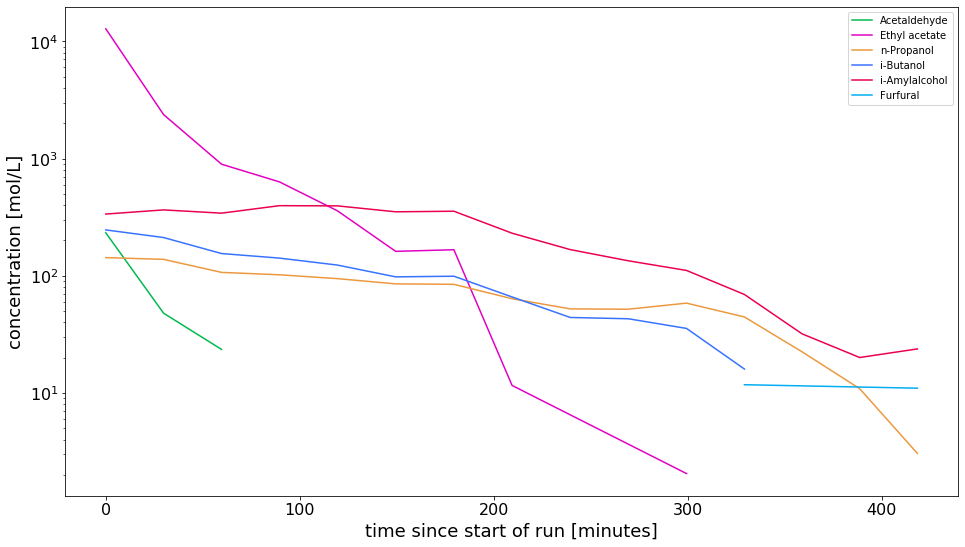

In [12]:
fig,ax=plt.subplots(1,figsize=(16,9))
for chem,col in zip(sps,chem_cols):
    if not chem == internal_std:
        trace=full_run[full_run['name']==chem]
        peaks=np.array(trace['peak area'])
        sample_nums=np.array(trace['sample'])
        trace_rfs=[]
        trace_times=[]
        for peak,s in zip(peaks,sample_nums):
            trace_rfs.append(peak/istds[str(s)])
            trace_times.append(sample_times[s-1])
        xs=[t-sample_times[0] for t in trace_times]
        x=[x.total_seconds()/60 for x in xs]
        rfs=np.array(trace_rfs)
        trace_concs=(rfs-calibration_mol.loc[chem,'b'])/calibration_mol.loc[chem,'a']
        ax.plot(x,trace_concs,label=chem,c=col)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('concentration [mol/L]',fontdict=font)
ax.set_xlabel('time since start of run [minutes]',fontdict=font)
plt.legend()
pic_file=os.path.join(os.getcwd(),'_output/experiment_mol.png')
plt.yscale("log")
plt.savefig(pic_file,bbox_inches='tight')  

## distillation fractions 

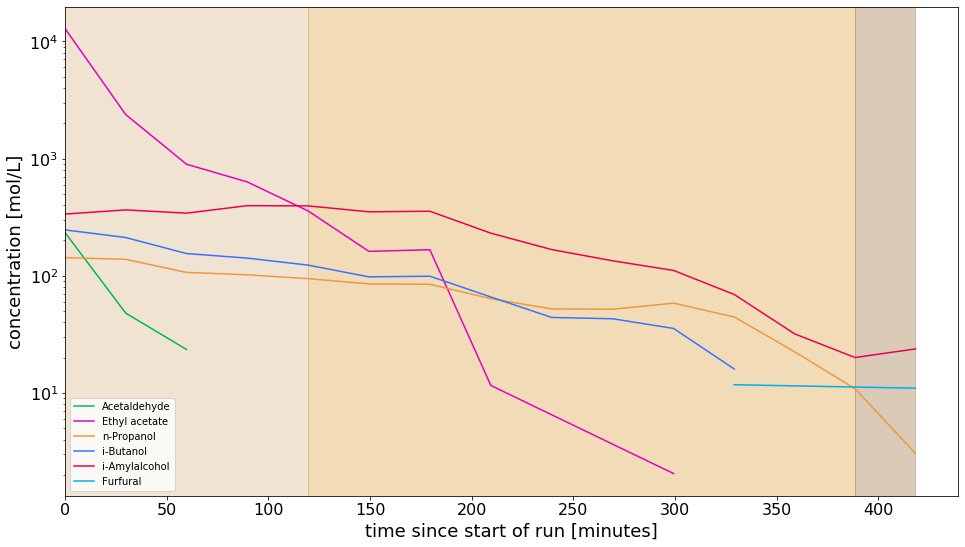

In [13]:
# number of samples taken during experiment
n_foreshots=5
n_spirit=9
n_feints=1

# made into list of times
fractions=[sample_times[:n_foreshots],
            sample_times[n_foreshots-1:n_spirit+n_foreshots],
            sample_times[-(n_feints+1):]]

# colours for plot
fraction_colours=["#d4af80",
                "#da9c35",
                "#926b36"]

# making molar plot again with highlighted fill sections for each fraction

fig,ax=plt.subplots(1,figsize=(16,9))
for chem,col in zip(sps,chem_cols):
    if not chem == internal_std:
        trace=full_run[full_run['name']==chem]
        peaks=np.array(trace['peak area'])
        sample_nums=np.array(trace['sample'])
        trace_rfs=[]
        trace_times=[]
        for peak,s in zip(peaks,sample_nums):
            trace_rfs.append(peak/istds[str(s)])
            trace_times.append(sample_times[s-1])
        xs=[t-sample_times[0] for t in trace_times]
        x=[x.total_seconds()/60 for x in xs]
        rfs=np.array(trace_rfs)
        trace_concs=(rfs-calibration_mol.loc[chem,'b'])/calibration_mol.loc[chem,'a']
        ax.plot(x,trace_concs,label=chem,c=col)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('concentration [mol/L]',fontdict=font)
ax.set_xlabel('time since start of run [minutes]',fontdict=font)
experiment_start=sample_times[0]
for fraction,fill_colour in zip(fractions,fraction_colours):
    start_t=fraction[0]-experiment_start
    end_t=fraction[-1]-experiment_start
    ax.axvspan(start_t.total_seconds()/60,
               end_t.total_seconds()/60,
               alpha=0.35,
               color=fill_colour)
plt.legend()
ax.set_xlim(left=0.0)
pic_file=os.path.join(os.getcwd(),'_output/experiment_fractions_mol.png')
plt.yscale("log")
plt.savefig(pic_file,bbox_inches='tight')  


In [14]:
full_run[full_run['retention time [min]']<2.2]

,retention time [min],peak type,peak width [min],peak area,peak height,area%,name,sample
0,2.143,BV,0.1302,43.1899,3.9605,0.1404,Acetaldehyde,1
0,2.141,BV,0.1213,9.8412,0.9876,0.0354,Acetaldehyde,2
0,2.151,BV,0.1295,7.1141,0.6614,0.0225,Acetaldehyde,3


## Distillation progress